In [44]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)

In [2]:
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [4]:
df = pd.read_csv('data_complete_clean.csv', sep=',')

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\4156492823.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_complete_clean.csv', sep=',')


- HD [mm]: hole depth
- PR [dm/min]: penetration rate
- HP [bar]: hammering pressure
- FP [bar]: feed pressure = Hydraulic pressure that pushes the drill against the tunnel
face.
- DP [bar]: dumper pressure = Hydraulic pressure that absorbs the reaction force that
the drill receives from the bedrock. The harder the bedrock, the greater the dumper
pressure.
- RS [r/min]: rotation speed
- RP [bar]: rotation pressure
- WF [l/min]: water flow
- WP [bar]: water pressure
- Time [hh:mm:ss]

In [5]:
dfs = df[(df['Section number * 1000']>=555000)&(df['Section number * 1000']<=777000)].reset_index() 

In [6]:
dfs

,index,Unnamed: 0.1,Unnamed: 0,HD mm,PR dm/min,HP bar,FP bar,DP bar,RS r/min,RP bar,WF l/min,WP bar,Time,reference,Hole number,Hole type,Date and time at rockcontact,Boom,Section number * 1000,x\ty\tz\tmm,Lookout\tLookoutdirection(Degrees*10)\tsample interval(cm),Rig serial number,dir,number,file,x mm,y mm,z mm
0,1237,1237,0,101,0.00,124.68,25.25,43.25,189.74,35.95,72.37,19.26,07:20:48,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
1,1238,1238,1,201,28.38,128.53,29.10,43.25,187.95,36.81,70.03,17.98,07:20:50,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
2,1239,1239,2,304,34.42,131.09,30.39,43.67,183.47,36.38,70.91,17.55,07:20:52,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
3,1240,1240,3,408,32.28,129.38,28.68,44.52,182.58,36.81,70.61,18.83,07:20:54,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
4,1241,1241,4,508,37.57,129.81,31.24,44.52,179.89,37.24,65.63,13.70,07:20:56,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216569,598211,598211,1644,1869,52.15,179.77,59.92,49.61,196.90,53.93,66.80,17.98,19:16:11,../Data/MWD Raw Data/No524-750/No583/03191548.MWD,-14,4,2021/06/03 19:15:48,1.0,637107.0,-4927\t-1793\t-991,128\t-1054\t10,8.999310e+09,No524-750,583,03191548.MWD,-4927,-1793,-991
216570,598212,598212,1645,1975,57.76,179.77,59.92,49.61,186.16,47.51,67.68,18.40,19:16:12,../Data/MWD Raw Data/No524-750/No583/03191548.MWD,-14,4,2021/06/03 19:15:48,1.0,637107.0,-4927\t-1793\t-991,128\t-1054\t10,8.999310e+09,No524-750,583,03191548.MWD,-4927,-1793,-991
216571,598213,598213,1646,2079,61.54,180.62,60.35,49.18,186.16,47.51,67.68,18.40,19:16:13,../Data/MWD Raw Data/No524-750/No583/03191548.MWD,-14,4,2021/06/03 19:15:48,1.0,637107.0,-4927\t-1793\t-991,128\t-1054\t10,8.999310e+09,No524-750,583,03191548.MWD,-4927,-1793,-991
216572,598214,598214,1647,2182,51.94,179.77,60.35,49.61,181.68,53.50,67.68,17.55,19:16:14,../Data/MWD Raw Data/No524-750/No583/03191548.MWD,-14,4,2021/06/03 19:15:48,1.0,637107.0,-4927\t-1793\t-991,128\t-1054\t10,8.999310e+09,No524-750,583,03191548.MWD,-4927,-1793,-991


In [7]:
dfs['Date and time at rockcontact'] = pd.to_datetime(dfs['Date and time at rockcontact'])

In [8]:
selected_columns_0 = [
    #'Unnamed: 0', 
    #'Unnamed: 0.1', 
    'HD mm', 
    'PR dm/min', 
    'HP bar', 
    'FP bar',
    'DP bar', 
    'RS r/min', 
    'RP bar', 
    'WF l/min', 
    'WP bar', 
    #'Time',
    #'reference', 
    #'Hole number', 
    'Hole type', 
    #'Date and time at rockcontact',
    #'Boom', 
    'Section number * 1000', 
    #'x\ty\tz\tmm',
    #'Lookout\tLookoutdirection(Degrees*10)\tsample interval(cm)',
    #'Rig serial number', 
    #'dir', 
    'number', 
    #'reference',
    #'file', 
    #'x mm', 
    #'y mm', 
    #'z mm',
]

# ensure all numbers are numerical data

In [9]:
for c in selected_columns_0:
    dfs[c] = dfs[c].astype(str).str.replace(r"_", '').astype(float)
selected_columns = selected_columns_0 + ['Date and time at rockcontact']

datas = dfs[selected_columns]

# average data for a single borehole

In [10]:
datas_avg = pd.DataFrame()
for t in datas['Date and time at rockcontact'].unique():
    tmp = datas[datas['Date and time at rockcontact'] == t].reset_index(drop=True)
    datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
datas = datas_avg.copy()
datas

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_42540\1568874222.py:4: Future

,HD mm,PR dm/min,HP bar,FP bar,DP bar,RS r/min,RP bar,WF l/min,WP bar,Hole type,Section number * 1000,number
0,663.750000,36.870000,131.445000,34.809167,44.732500,183.771667,38.948333,68.928333,17.549167,4.0,667464.0,613.0
1,822.733333,43.149333,127.617333,36.636667,44.802000,185.204000,45.538667,68.054000,17.775333,0.0,667464.0,613.0
2,824.200000,39.564667,147.118000,38.064000,44.767333,179.578667,43.286667,64.988667,17.205333,4.0,667464.0,613.0
3,1068.050000,29.999500,130.961000,37.234500,43.778000,185.755500,37.365000,72.341000,17.675500,4.0,667464.0,613.0
4,816.800000,39.468667,130.748667,35.665333,45.339333,188.426667,42.001333,66.920000,17.662667,6.0,667464.0,613.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11785,971.166667,46.334444,153.747778,42.774444,44.012778,186.315556,46.153333,66.560556,16.952778,8.0,637107.0,583.0
11786,1292.333333,50.699167,164.679167,53.374583,47.628333,188.508750,44.476250,66.426250,17.780417,7.0,637107.0,583.0
11787,1126.476190,43.469048,160.275714,46.895238,45.613810,188.152381,46.173810,69.385238,17.874762,4.0,637107.0,583.0
11788,191.600000,25.834000,135.676000,41.258000,43.144000,185.856000,43.430000,67.392000,17.290000,8.0,637107.0,583.0


# now the MWD data is clean and ready to add target variables

In [11]:
datas

,HD mm,PR dm/min,HP bar,FP bar,DP bar,RS r/min,RP bar,WF l/min,WP bar,Hole type,Section number * 1000,number
0,663.750000,36.870000,131.445000,34.809167,44.732500,183.771667,38.948333,68.928333,17.549167,4.0,667464.0,613.0
1,822.733333,43.149333,127.617333,36.636667,44.802000,185.204000,45.538667,68.054000,17.775333,0.0,667464.0,613.0
2,824.200000,39.564667,147.118000,38.064000,44.767333,179.578667,43.286667,64.988667,17.205333,4.0,667464.0,613.0
3,1068.050000,29.999500,130.961000,37.234500,43.778000,185.755500,37.365000,72.341000,17.675500,4.0,667464.0,613.0
4,816.800000,39.468667,130.748667,35.665333,45.339333,188.426667,42.001333,66.920000,17.662667,6.0,667464.0,613.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11785,971.166667,46.334444,153.747778,42.774444,44.012778,186.315556,46.153333,66.560556,16.952778,8.0,637107.0,583.0
11786,1292.333333,50.699167,164.679167,53.374583,47.628333,188.508750,44.476250,66.426250,17.780417,7.0,637107.0,583.0
11787,1126.476190,43.469048,160.275714,46.895238,45.613810,188.152381,46.173810,69.385238,17.874762,4.0,637107.0,583.0
11788,191.600000,25.834000,135.676000,41.258000,43.144000,185.856000,43.430000,67.392000,17.290000,8.0,637107.0,583.0


# add targets

In [21]:
expl = pd.read_csv('explosives.csv')

In [22]:
expl['upper \n/\nbottom']=expl['upper \n/\nbottom'].replace(['upper'],11)
expl['upper \n/\nbottom']=expl['upper \n/\nbottom'].replace(['bottom'],22)
expl['upper \n/\nbottom']=expl['upper \n/\nbottom'].replace(['upper & bottom'],33)

In [23]:
expl

,Unnamed: 0,tunnel support\n pattern,face\nNo.,upper \n/\nbottom,area\n[m2],progression\n[m],excavation \nvolume\n[m3],date,"wg3,piece","wg3,kg","wg25,piece","wg25,kg","wg,kg","anfo,kg","f06,piece","fconnect,piece","eldet,piece",pyro1,pyro2,pyro3,pyro4,pyro5,pyro6,pyro7,pyro8,pyro9,pyro10,pyro12,pyro14,pyro16,pyro17,pyro18,pyro19,pyro20,pyro21,total,kg/m3,faceN
0,0,C_,124,11,30.681,1.2,36.8,2020.9.18,63.0,6.3,0.0,0.0,0.0,40.0,5.0,5.0,1.0,0.0,0.0,2.0,2.0,6.0,13.0,11.0,21.0,6.0,2.0,0,0,0,0,0,0,0,0,63.0,1.26,124
1,1,C_,125,11,30.681,1.2,36.8,2020.9.18,83.0,8.3,0.0,0.0,0.0,59.0,7.0,7.0,1.0,2.0,5.0,8.0,7.0,6.0,11.0,12.0,24.0,6.0,2.0,0,0,0,0,0,0,0,0,83.0,1.83,125
2,2,D_-L,99-100,22,33.262,2.0,66.5,2020.9.23,22.0,2.2,0.0,0.0,11.7,20.0,3.0,4.0,1.0,0.0,0.0,0.0,7.0,10.0,3.0,2.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,22.0,0.51,100
3,3,D_-L,101-102,22,33.262,2.0,66.5,2020.9.23,23.0,2.3,0.0,0.0,10.0,31.0,4.0,5.0,2.0,0.0,0.0,0.0,7.0,4.0,5.0,5.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,23.0,0.65,102
4,4,D_-L,103-104,22,33.262,1.0,33.3,2020.9.23,27.0,2.7,0.0,0.0,9.5,39.0,4.0,4.0,1.0,0.0,0.0,0.0,7.0,5.0,8.0,5.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,27.0,1.54,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,868,D_,1032,33,98.744,1.0,98.7,2021.12.8,0.0,0.0,488.0,48.8,0.0,65.0,8.0,8.0,1.0,9.0,12.0,11.0,16.0,6.0,6.0,7.0,8.0,6.0,2.0,0,0,0,0,0,0,0,0,83.0,0.66,1032
869,869,D_,1033,11,98.744,1.0,98.7,2021.12.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.00,1033
870,870,D_,1034,33,98.744,1.0,98.7,2021.12.9,0.0,0.0,450.0,45.0,0.0,52.0,8.0,8.0,1.0,10.0,12.0,10.0,15.0,10.0,8.0,4.0,5.0,6.0,2.0,0,0,0,0,0,0,0,0,82.0,0.53,1034
871,871,D_,1035,11,98.744,1.0,98.7,2021.12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.00,1035


In [24]:
expl.columns

Index(['Unnamed: 0', 'tunnel support\n pattern', 'face\nNo.',
       'upper \n/\nbottom', 'area\n[m2]', 'progression\n[m]',
       'excavation \nvolume\n[m3]', 'date', 'wg3,piece', 'wg3,kg',
       'wg25,piece', 'wg25,kg', 'wg,kg', 'anfo,kg', 'f06,piece',
       'fconnect,piece', 'eldet,piece', 'pyro1', 'pyro2', 'pyro3', 'pyro4',
       'pyro5', 'pyro6', 'pyro7', 'pyro8', 'pyro9', 'pyro10', 'pyro12',
       'pyro14', 'pyro16', 'pyro17', 'pyro18', 'pyro19', 'pyro20', 'pyro21',
       'total', 'kg/m3', 'faceN'],
      dtype='object')

# ensure all numbers are numerical data

In [27]:
expl_columns_tonum = ['area\n[m2]', 'progression\n[m]','upper \n/\nbottom',
       'excavation \nvolume\n[m3]', 'wg3,piece', 'wg3,kg',
       'wg25,piece', 'wg25,kg', 'wg,kg', 'anfo,kg', 'f06,piece',
       'fconnect,piece', 'eldet,piece', 'pyro1', 'pyro2', 'pyro3', 'pyro4',
       'pyro5', 'pyro6', 'pyro7', 'pyro8', 'pyro9', 'pyro10', 'pyro12',
       'pyro14', 'pyro16', 'pyro17', 'pyro18', 'pyro19', 'pyro20', 'pyro21',
       'total', 'kg/m3', 'faceN']

In [28]:
expl[expl_columns_tonum] = expl[expl_columns_tonum].apply(pd.to_numeric, errors='coerce')
expl.date = pd.to_datetime(expl.date)
expl = expl.dropna().reset_index(drop=True)

# add target values to MWD data

In [29]:
target_columns = ['excavation \nvolume\n[m3]', 'total','kg/m3', 'upper \n/\nbottom']
datas[target_columns] = 0
for exp in expl.faceN.unique():
    for col in target_columns:
        val = sum(expl[expl.faceN == exp][col])
        datas.loc[datas.number == exp,col]=val

# now the dataset is ready for analysis

In [31]:
datas = datas[datas['upper \n/\nbottom']==11].reset_index(drop=True)

# PCA 

In [32]:
#features = ['HD mm','PR dm/min','HP bar','FP bar','DP bar','RS r/min','RP bar','WF l/min','WP bar']
features = ['PR dm/min','HP bar','FP bar','DP bar','RS r/min','RP bar','WF l/min','WP bar']
#features = ['PR dm/min','HP bar','RS r/min']

X = datas.loc[:, features].values
            
x = StandardScaler().fit_transform(X)

components = len(features)    
pca = PCA(n_components=components)

principalComponents = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[0.31436782 0.22182356 0.13243357 0.11880699 0.09635825 0.04675517
 0.04393841 0.02551623]


In [33]:
pc = pd.DataFrame(principalComponents)

# Scree Plot


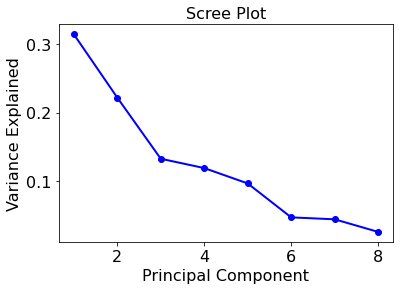

In [45]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


# add PCA results to main dataset

In [34]:
rf_datas = datas.join(pc)
rf_datas

,HD mm,PR dm/min,HP bar,FP bar,DP bar,RS r/min,RP bar,WF l/min,WP bar,Hole type,Section number * 1000,number,excavation \nvolume\n[m3],total,kg/m3,upper \n/\nbottom,0,1,2,3,4,5,6,7
0,888.437500,73.919375,143.312500,45.848125,45.632500,194.996250,41.970625,75.978750,17.067500,0.0,605240.0,558.0,98.7,48,0.48,11,-0.021680,-2.333082,0.877022,-1.291379,0.641684,0.134888,0.454930,0.420339
1,889.812500,60.236250,148.596250,45.394375,44.110625,184.415000,47.837500,69.955625,18.029375,0.0,605240.0,558.0,98.7,48,0.48,11,0.087735,-0.749121,0.578565,0.503637,1.074900,0.313060,-0.263400,-0.048768
2,951.588235,69.951765,137.312941,37.840000,42.598824,184.178824,45.099412,69.717059,17.219412,0.0,605240.0,558.0,98.7,48,0.48,11,1.377779,-0.860406,1.412563,-0.051593,1.465067,-0.066492,-0.258192,-0.142364
3,868.562500,46.829375,149.104375,45.634375,43.201250,183.315000,42.623750,68.930000,17.228125,0.0,605240.0,558.0,98.7,48,0.48,11,0.693844,-0.325146,0.983704,0.437167,-0.118619,0.766112,-0.597527,-0.010533
4,929.470588,61.048824,151.311176,46.374118,43.102941,183.195294,42.772353,71.198824,17.623529,0.0,605240.0,558.0,98.7,48,0.48,11,0.453937,-1.077722,1.359829,0.494547,0.613710,0.660872,-0.494520,0.049023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,875.937500,50.830000,151.745000,49.675000,46.931875,190.970625,46.946250,71.216875,18.243750,0.0,591872.0,540.0,98.7,87,0.97,11,-0.942606,-1.061435,-0.392885,0.024095,0.031204,0.165946,0.205706,0.273076
3962,990.333333,56.150556,142.048889,40.563333,43.584444,183.137778,49.497778,69.084444,16.739444,0.0,591872.0,540.0,98.7,87,0.97,11,0.850805,0.079817,0.745196,-0.053764,1.109499,0.464872,0.014285,-0.470181
3963,876.500000,54.381875,151.530625,49.753750,47.063750,188.676250,49.620625,71.766250,17.948750,0.0,591872.0,540.0,98.7,87,0.97,11,-1.048816,-0.814800,-0.269490,0.037561,0.507175,0.339751,0.522594,0.093927
3964,972.333333,41.289444,125.926667,27.368889,41.492222,183.871111,40.921667,72.225000,17.880000,0.0,591872.0,540.0,98.7,87,0.97,11,3.230596,-0.765344,0.369218,0.729081,-0.064832,-0.225505,-0.424019,-0.697272


# Random forest

In [35]:
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model

# reshuffle the data

In [36]:
rf_datas = rf_datas.sample(frac=1).reset_index(drop=True)
rf_datas

,HD mm,PR dm/min,HP bar,FP bar,DP bar,RS r/min,RP bar,WF l/min,WP bar,Hole type,Section number * 1000,number,excavation \nvolume\n[m3],total,kg/m3,upper \n/\nbottom,0,1,2,3,4,5,6,7
0,663.500000,29.196667,132.440833,49.183333,44.943333,196.452500,42.870000,67.390833,17.335000,0.0,703102.0,650.0,98.7,42,0.28,11,0.427537,-0.280330,-0.902279,-0.732837,-1.239313,0.571408,-0.690441,0.944091
1,668.083333,52.690000,132.475833,40.554167,44.343333,195.705833,40.445833,73.835833,17.904167,0.0,600785.0,548.0,98.7,34,0.18,11,1.147948,-1.905432,-0.100670,-0.642583,-0.221142,-0.111330,-0.218520,0.410972
2,832.533333,43.450000,128.840667,45.910667,44.266000,192.544667,48.934667,67.057333,18.031333,0.0,703102.0,650.0,98.7,42,0.28,11,0.517955,-0.242018,-0.872495,-0.199568,0.403474,0.219539,-0.597443,0.668478
3,665.083333,49.826667,158.858333,49.898333,47.472500,181.940000,47.730000,62.921667,18.439167,0.0,770957.0,715.0,98.7,61,0.21,11,-1.430251,0.280025,0.306869,1.045847,0.108193,-0.399688,0.061774,0.271238
4,917.764706,47.347059,177.771176,50.428824,49.294706,183.712941,47.932353,67.045294,18.026471,4.0,759655.0,703.0,98.7,98,0.29,11,-2.269734,-0.094197,0.190941,0.681279,-0.445497,-0.210705,0.636107,-0.486749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,834.266667,60.294667,139.070667,40.630000,42.400000,184.096000,49.851333,72.411333,17.435333,0.0,599853.0,546.0,98.7,50,0.52,11,1.171651,-0.646059,0.547429,0.210550,1.575015,0.685500,-0.246714,-0.428678
3962,655.692308,31.775385,124.190769,34.799231,47.486923,184.781538,43.654615,70.838462,18.206154,0.0,742991.0,689.0,98.7,74,0.00,11,1.135175,-0.190218,-0.773844,0.795273,-0.968021,-0.734123,1.234143,-0.038490
3963,877.875000,50.778750,144.219375,43.547500,47.275000,192.870625,41.810625,70.027500,16.236250,0.0,665373.0,612.0,98.7,38,0.24,11,-0.060751,-0.670165,0.472631,-1.293008,-0.744471,-0.132751,0.716314,0.174852
3964,660.583333,32.596667,129.219167,42.906667,44.870000,186.560000,45.938333,68.806667,18.013333,0.0,722926.0,672.0,98.7,73,0.50,11,0.923996,0.018858,-0.676459,0.585243,-0.441523,0.287292,-0.034715,0.316974


# test train split

In [37]:
columns = [ 'Hole type','FP bar', 'DP bar', 'RS r/min','RP bar', 'WF l/min', 
           'PR dm/min', 'HP bar','HD mm']+[0,1,2]

In [38]:
x = rf_datas[columns] # Features
y = rf_datas['kg/m3'].values  # Target

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# train RF

In [40]:
rf = RandomForestRegressor(n_estimators = 600, random_state = 42)
rf.fit(x_train, y_train)

C:\Users\Abdallah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(n_estimators=600, random_state=42)

# Predict with RF and evaluate

In [41]:
prediction = rf.predict(x_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse,rmse)

0.03138547091479928 0.17715945053764215


C:\Users\Abdallah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# feature importance

Text(0, 0.5, 'Mean decrease in impurity')

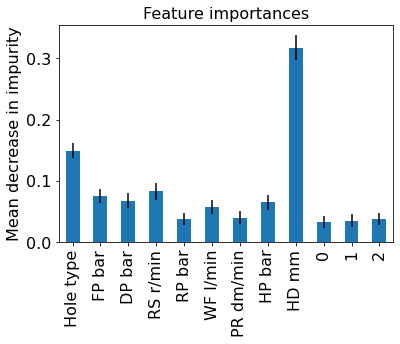

In [42]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")

# visual check on pred and act

In [43]:
rf_out = pd.DataFrame(prediction, columns=['pred'])
rf_out['act'] = y_test
rf_out = rf_out.sort_values(by=['act']).reset_index(drop=True)
rf_out

,pred,act
0,0.287817,0.00
1,0.215733,0.00
2,0.217617,0.00
3,0.260867,0.00
4,0.190167,0.00
...,...,...
1185,0.930183,1.09
1186,0.645900,1.09
1187,0.965783,1.09
1188,0.522183,1.09


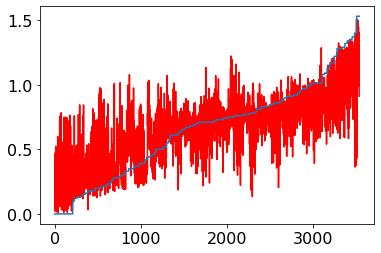

In [31]:
plt.plot(rf_out.pred, color='red')
plt.plot(rf_out.act)